# Load dataset

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


# Preprocess dataset

## One-hot encode data

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## One-hot encode labels

In [7]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
import numpy as np

y_train = np.array(train_labels)
y_test = np.array(test_labels)

[ 3  4  3 ... 25  3 25]
[ 3  4  3 ... 25  3 25]


# Create model

In [4]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0824 12:38:55.728177 140008847386432 deprecation_wrapper.py:119] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 12:38:55.745336 140008847386432 deprecation_wrapper.py:119] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 12:38:55.749075 140008847386432 deprecation_wrapper.py:119] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

W0824 12:38:59.150692 140008847386432 deprecation_wrapper.py:119] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0824 12:38:59.192810 140008847386432 deprecation_wrapper.py:119] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# Separate into validation and training datasets

In [6]:
x_val = x_train[:1000]
partial_x_train= x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Fit model

In [7]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

W0824 12:39:04.446132 140008847386432 deprecation.py:323] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0824 12:39:04.514302 140008847386432 deprecation_wrapper.py:119] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 181us/step - loss: 2.5326 - acc: 0.4946 - val_loss: 1.7229 - val_acc: 0.6110
Epoch 2/9
7982/7982 [==============================] - 1s 75us/step - loss: 1.4496 - acc: 0.6869 - val_loss: 1.3483 - val_acc: 0.7090
Epoch 3/9
7982/7982 [==============================] - 1s 75us/step - loss: 1.0978 - acc: 0.7652 - val_loss: 1.1702 - val_acc: 0.7440
Epoch 4/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.8699 - acc: 0.8172 - val_loss: 1.0773 - val_acc: 0.7610
Epoch 5/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.7030 - acc: 0.8482 - val_loss: 0.9829 - val_acc: 0.7830
Epoch 6/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.5661 - acc: 0.8800 - val_loss: 0.9393 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.4590 - acc: 0.9033 - val_loss: 0.9065 - val_acc: 0.8020
Epoch 8/9
798

# Evaluate model

## Plot training and validation loss

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

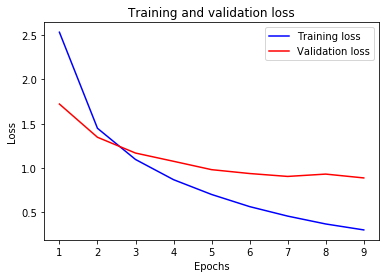

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot training and validation accuracy

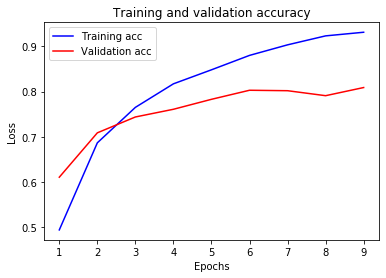

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Get final performance

In [11]:
test_loss, test_acc = model.evaluate(x_test, one_hot_test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

2246/2246 [==============================] - 0s 90us/step
Test loss: 0.9810699539745056
Test accuracy: 0.7876224399462196


# Predict

In [12]:
predictions = model.predict(x_test)

In [13]:
np.argmax(predictions[0])

3